# E6. 나의 첫 번째 캐글 경진대회, 무작정 따라해보기

## 1. 들어가며

- 국내 최대 캐글 커뮤니티인 [캐글코리아(Kaggle Korea)](https://www.facebook.com/groups/KaggleKoreaOpenGroup/)가 2019년 주최했던 캐글 경진대회인 **2019 2nd ML month with KaKR**를 처음부터 끝까지 직접 경험
- 대회의 규칙과 분위기를 살펴보는 것부터, 머신러닝을 활용해서 모델을 학습시킨 뒤 제출하고 내 랭킹을 확인하는 부분까지 진행

### 학습 목표
- 데이터 사이언스 관련 최대 커뮤니티인 캐글의 경진대회에 직접 참여해서 문제를 해결
- 캐글에서 데이터를 내려받는 것으로부터 시작해서, 로컬 서버에서 자유롭게 다루어보며 문제 해결을 위한 고민하기
- 앙상블 기법의 개념과 강점을 이해하고, 여러 모델의 예측 결과를 Averaging한 최종 결과로 캐글에 제출해보기
- 하이퍼 파러미터 튜닝의 필요성과 의미를 이해하고, Grid Search, Random Search 등의 기법을 알아보기
- Gird Search 기법을 활용해서 직접 하이퍼 파라미터 튜닝 실험을 해보고, 모델의 성능을 최대한 끌어올려보기

### 학습 전제
- 정형 데이터를 이용해 EDA와 간단한 분류, 회귀 문제를 해결해본 적이 있음
- numpy, pandas, matplotlib을 활용해 정형 데이터를 자유자재로 다룰 수 있음
- 정형 데이터를 활용해 다양한 모델을 학습시켜보고, 예측 결과를 도출하는 것까지의 과정을 코드로 진행

### 준비물
- 회귀 모델을 구현하는 데에 사용하는 xgboost와 lightgbm 라이브러리와, 결측 데이터를 확인하는 missingno 라이브러리가 필요
- 클라우드 커널 사용시에는 미리 필요한 라이브러리가 설치되어있기 때문에 따로 설치하지 않고 실습을 위한 디렉토리만 생성해 주면 됨
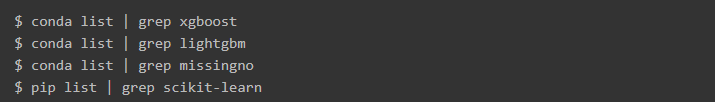

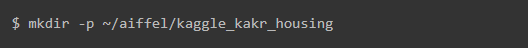

## 2. 대회의 시작 (1) 참가 규칙, 평가 기준 살펴보기

- **캐글(Kaggle)**: 데이터 사이언티스트들을 위한 경진대회 사이트
- 참가할 대회 페이지 접속: [캐글 코리아와 함께하는 2nd ML 대회 - House Price Prediction(https://www.kaggle.com/c/2019-2nd-ml-month-with-kakr)

### A. Description, 대회 소개
- 캐글에는 아주 다양한 경진대회들이 있음
- 각 경진대회들은 모두 대회 소개, 데이터셋 소개, 규칙 설명 등 대회에 참가하는 사람들을 위한 세부 내용들로 구성되어 있음
- 대회별로 평가 방법과 규칙이 상이하니, 대회를 본격적으로 시작하기 전에 소개와 세부 내용을 읽고 시작하는 것이 좋음
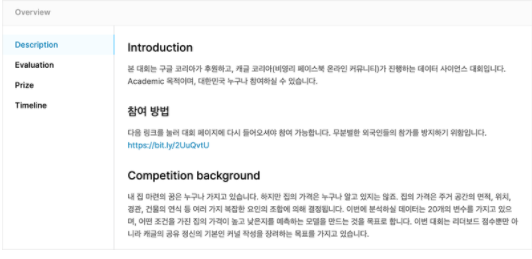

### B. Evaluation, 점수 평가 기준
- 왼쪽 탭에서 Evaluation을 누르면 평가 방식은 RMSE라고 되어 있음
- $${\sqrt{ {1 \over N} \sum{(yt - y{pr})}^2}} $$
- RMSE? Root Mean Squared Error. 실제 정답과 예측한 값의 차이의 제곱을 평균한 값의 제곱근
- 이번에 다루는 문제는 "집값"을 예측하는 문제이기 때문에 우리가 예측해야 하는 값과 실제 정답값이 모두 실숫값
- 그 두 가자의 값의 차이를 사용해 얼마나 떨어져 있는지 계산할 수 있는 rmse를 평가 척도로 사용

### C. Prize, 상품
- 상위 리더보드 등 특정 대상자에게 주는 혜택
- 대회가 마무리된 후 사용한 소스코드를 커널 항목에 공개해야하는 의무가 있음
- 지식의 '공유'와 '공개'를 지향하는 캐글의 정신을 본따 정해진 규칙

### D. Timeline, 대회 일정
- 대회 일정 숙지도 중요
- 대회의 공식 마감일 전에 여러 실험을 통해 성능을 끌어올려야 함
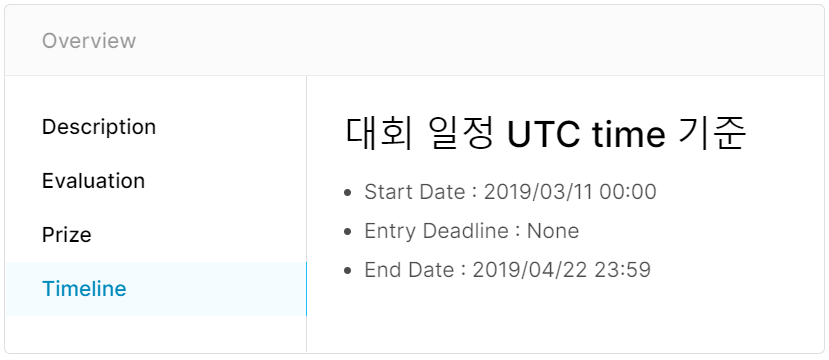

### E. Rules, 대회 규칙
- 많은 사람이 참가하고, 또 상품이 걸려있는 만큼 엄격한 규칙들이 있을 수 있음
- 부정행위를 통해 얻은 점수는 무효가 될 뿐만 아니라 향후 캐글의 다른 대회에 참가하는 것에도 불이익이 있을 수 있음
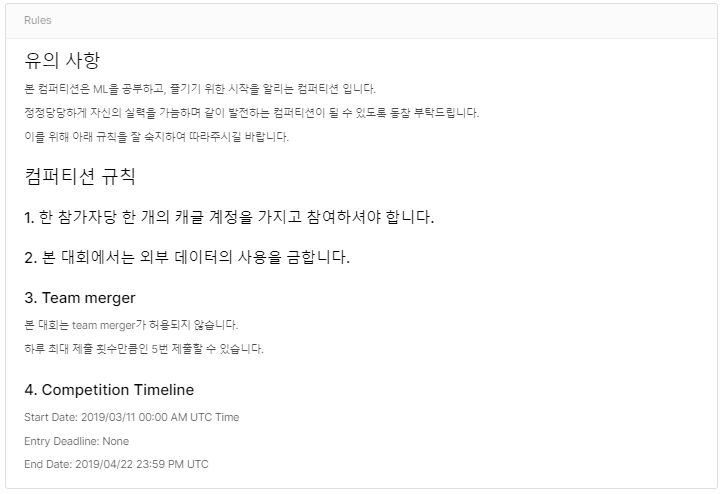
- 이번 대회에서는 외부 데이터의 사용을 금지하고 있음
- 또한, 하루 최대 제출 횟수는 5번(무작위로 많이 제출하는 것을 방지하기 위함)

## 3. 대회의 시작 (2) 데이터 살펴보기

### F. Data Description, 데이터 설명
- 복잡한 데이터일수록, 데이터의 설명을 굉장히 꼼꼼하게 읽는 것이 중요
- 데이터를 이해할수록, 더 좋은 결과를 낼 수 있음
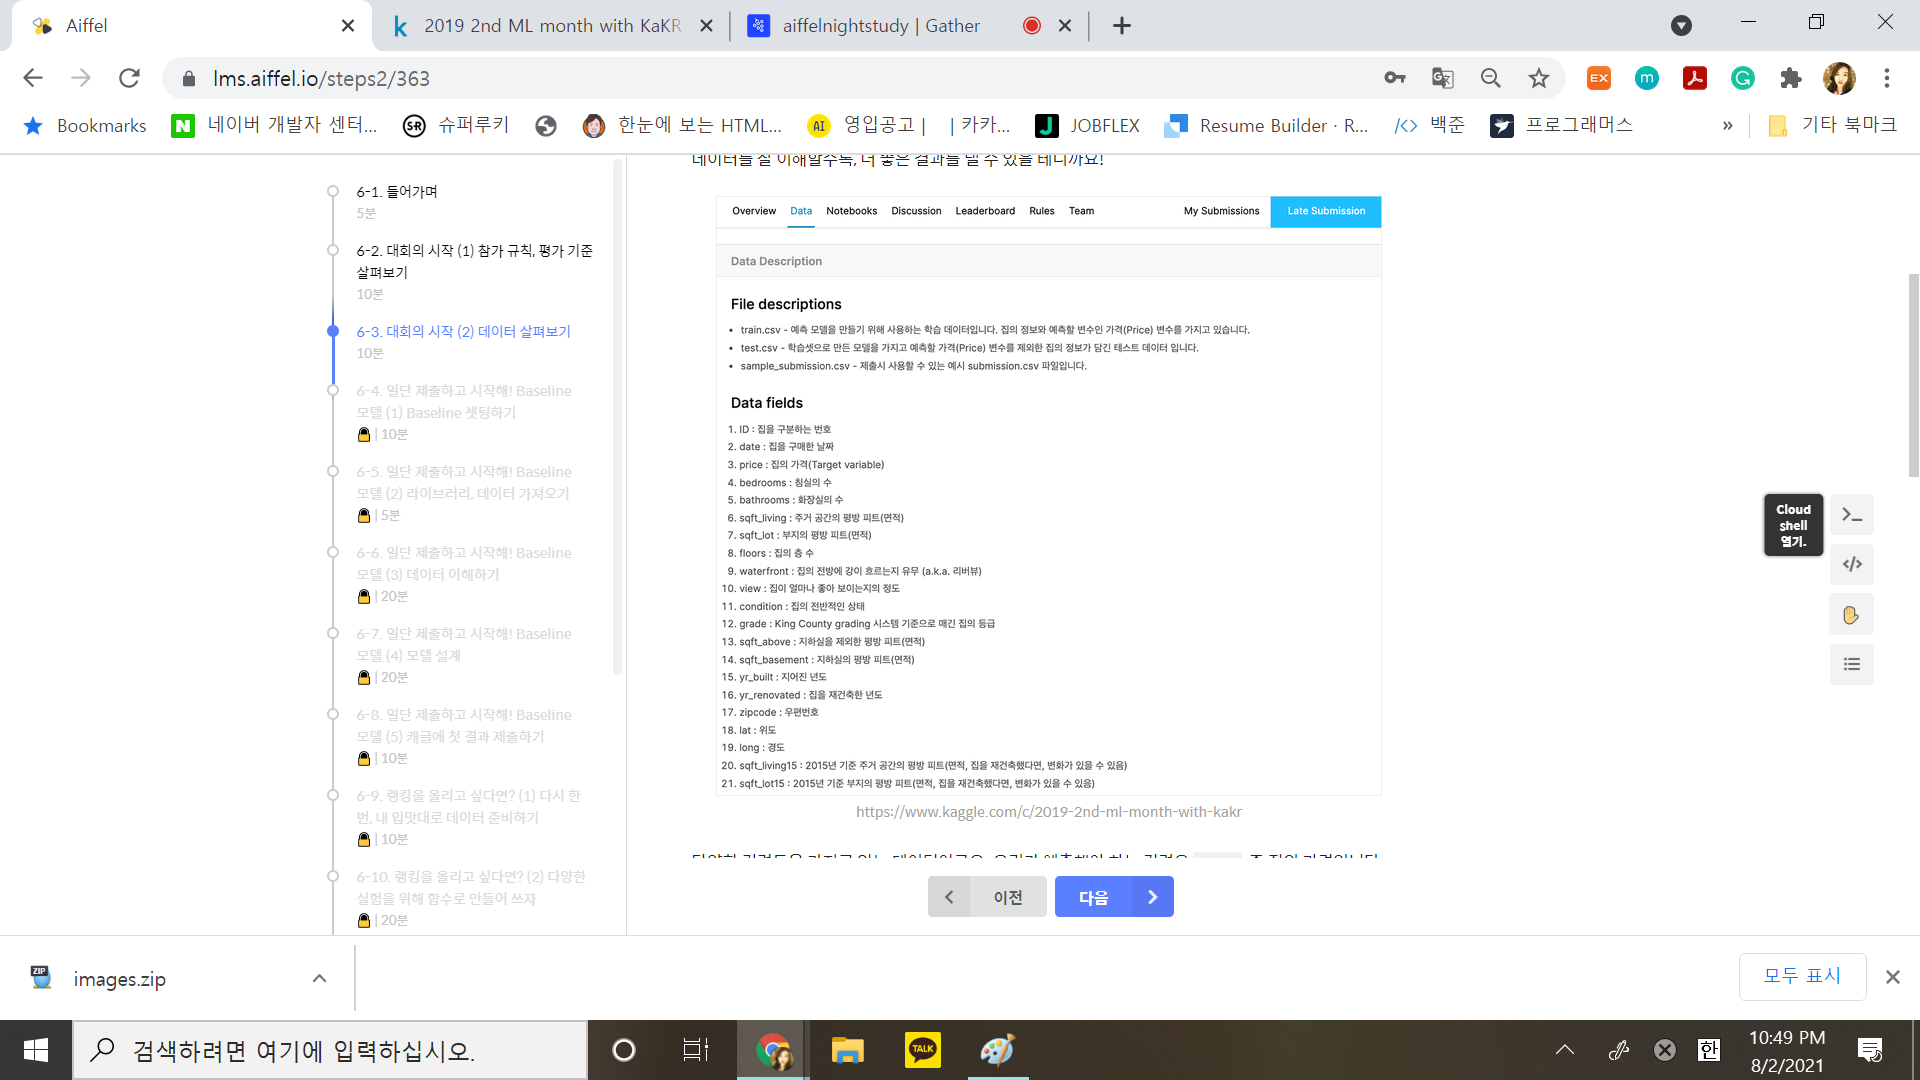
- 다양한 컬럼들을 가지고 있는 데이터
- 우리가 예측해야 하는 컬럼은 'price', 즉 집의 가격

### G. Data Explorer, 데이터 파일
- 데이터셋 자체에 대한 설명 외에도, 우리가 다운받아야 할 데이터 파일에 대한 형태 살펴봐야 함
- 이 대회에서는 'train.csv'라는 모델 학습용 파일과, 'test.csv'라는 테스트용 파일, 그리고 'sample_submission.csv'라는 제출용 파일이 제공됨
- 'train.csv'를 활용해서 데이터를 뜯어보고 모델을 학습시킨 후, 'test.csv' 파일의 데이터에 대해 'price'를 예측해서 'sample_submission.csv'의 형식에 맞는 형태로 캐글에 제출을 해볼 것
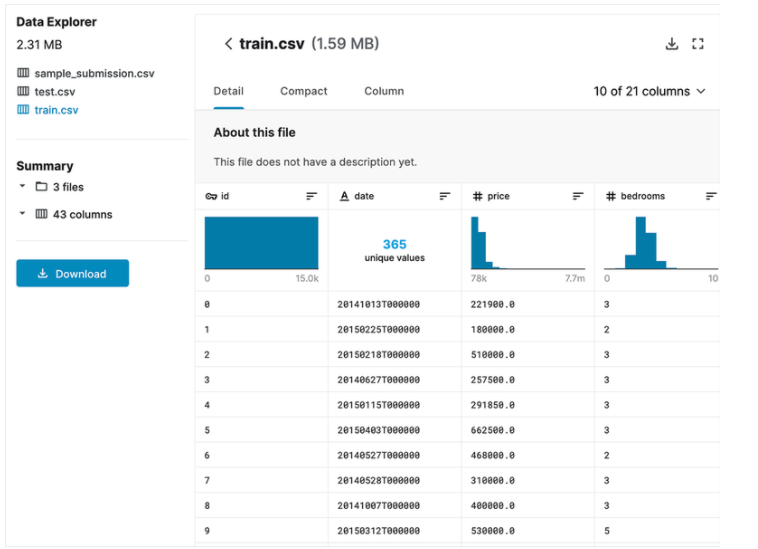

- 'Cloud Shell'에서 아래 명령어 입력
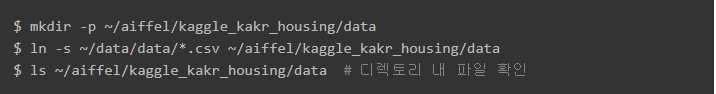

## 4. 일단 제출하고 시작해! Baseline 모델 (1) Baseline 셋팅하기

- 이번 대회에서는 주최자 차원에서 Baseline을 제공했음
- Baseline? 기본적으로 문제 해결을 시작할 때 쉽게 사용해볼 수 있는 샘플
- Baseline으로 빠르게 제출
- Baseline 커널: [2019 ML month 2nd baseline 커널](https://www.kaggle.com/kcs93023/2019-ml-month-2nd-baseline)

### 다른 사람의 커널을 ipynb 파일로 다운받아 사용하기
- 캐글의 **커널(Kernel)** 은 우리가 쓰는 주피터 노트북 형태의 파일이 캐글 서버에서 실행될 때 그 프로그램을 일컫는 개념
- 캐글 자체의 서버에서 baseline 노트북 파일을 돌리고 모델 학습을 시킬 수 있음
- 아래와 같이 보이는 화면에서 'Copy and Edit' 버튼 누르기
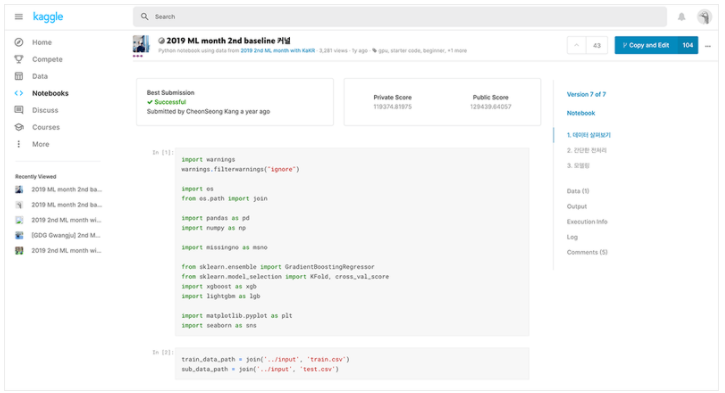
- 'Copy and Edit' 버튼을 클릭하면 다음과 같은 웹상에서 코드를 돌려볼 수 있는 커널 창이 뜸
- 이렇게 커널 창 위에서 그대로 진행해도 되지만, 이번에는 노트북 파일을 다운로드하여 사용해보기
- 아래처럼 'File > Download'를 통해 커널을 ipynb 파일로 다운받기
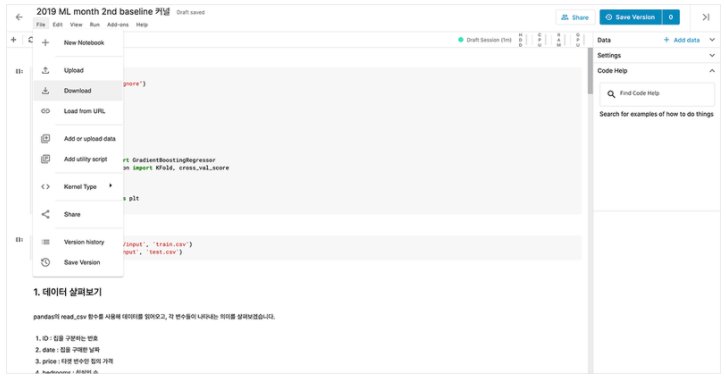
- 다운로드를 클릭하면 다음와 같은 이름으로 된 'ipynb' 파일이 다운로드된 것을 확인할 수 있음
- 이제 이 파일을 프로젝트 폴더로 이동시킨 뒤, 주피터 노트북을 실행시켜서 파일을 열어보기
- [코딩도장 - 주피터 노트북 사용하기](https://dojang.io/mod/page/view.php?id=2457)
> 아래서부터는 Cloud Jupyter를 열어 '2019-ml-month-2nd-baseline-ipynb' 파일의 주피터 노트북을 직접 띄우고 설명을 참고하면서 노트북의 셀을 직접 실행

### Baseline 커널 파일 실행 준비
- Baseline의 모든 코드를 에러없이 잘 돌리기 위해서는 몇 가지 준비가 필요

#### 데이터 파일을 현재 디렉토리로 옮기기
- 먼저, 데이터를 노트북 파일과 같은 폴더 내에 두어야 함
- 혹시 다른 위치에 압축을 해제했다면, 모델 학습 및 예측에 필요한 파일이 들어 있는 데이터 폴더를 아래와 같은 형태로 노트북과 같은 위치로 옮겨주기
- 클라우드 커널 사용시, 본 화면 우측 하단에 있는 버튼들 중, 위에서 2번째의 Cloud Jupyter 환경 열어주기
- 'aiffel', 'kaggle_kakr_housing' 디렉토리 순으로 이동하여 Cloud Jupyer 화면 우측 상단의 'Upload' 버튼을 눌러, 캐글에서 다운받은 '2019-ml-month-2nd-baseline.ipynb' 파일 업로드
- '~/aiffel/kaggle_kakr_housing' 폴더 활용하기
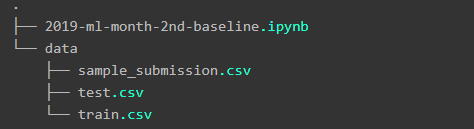


### 필요한 라이브러리 설치하기
- Baseline이 사용하는 몇 가지 라이브러리를 설치하는 법 알아보기
- 회귀 모델을 구현하는 데에 사용하는 'xgboost'와 'lightbgm' 라이브러리, 결측 데이터를 확인하는 'missingno' 라이브러리 필요
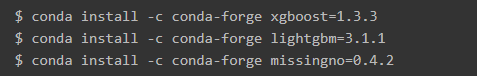

### Jupyter Notebook 파일 실행 후, matplotlib 시각화를 위해 다음 셀 실행하기
- 위에서 다운받았던 '2019-ml-month-2nd-baseline.ipynb' 주피터 노트북 파일 실행
- Baseline 커널에는 다양한 시각화 코드가 있기 때문에 노트북의 맨 위에 아래의 코드를 실행시켜서 그래프가 나타날 수 있도록 함

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
# 그래프를 더 높은 해상도로 출력
%config InlineBackend.figure_Format = 'retina'

## 5. 일단 제출하고 시작해! Baseline 모델 (2) 라이브러리, 데이터 가져오기

- 이제부터는 실제 Baseline 커널에 있는 내용
- 대다수의 코드는 Baseline 커널에 있는 그대로이고, 중간중간 필요한 부분에 한해 부가설명 추가

In [2]:
# 필요한 라이브러리 import 하기
import warnings
warnings.filterwarnings("ignore")

import os
from os.path import join

import pandas as pd
import numpy as np

import missingno as msno

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score
import xgboost as xgb
import lightgbm as lgb

import matplotlib.pyplot as plt
import seaborn as sns

print('얍💢')

얍💢


### 데이터 경로 지정하기
- 주의할 점은, 우리의 파일 경로는 Baseline 커널과 다르다는 점
- [파이썬 공식 문서 - os.path.join](https://docs.python.org/3/library/os.path.html#os.path.join)
- Baseline 커널은 캐글의 서버에서 돌아가도록 코드가 설계되었기 때문에 데이터가 아래와 같이 '../input'이라는 디렉토리에 위치

#### 1) Baseline 커널의 기존 코드
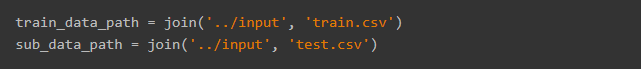
- 하지만 프로젝트 디렉토리(~/aiffel/kaggle_kakr_housing 등) 내 data 폴더에 있는 파일을 사용하기로 했으므로 다음과 같이 바꾸기

In [3]:
#2) LMS에서 사용할 때 알맞은 파일 경로
data_dir = os.getenv('HOME') + '/aiffel/kaggle_kakr_housing/data'

train_data_path = join(data_dir, 'train.csv')
# 테스트, 즉 submisssion 시 사용할 데이터 경로
sub_data_path = join(data_dir, 'test.csv')

print(train_data_path)
print(sub_data_path)

/aiffel/aiffel/kaggle_kakr_housing/data/train.csv
/aiffel/aiffel/kaggle_kakr_housing/data/test.csv


## 6. 일단 제출하고 시작해! Baseline 모델 (3) 데이터 이해하기

### 데이터 살펴보기
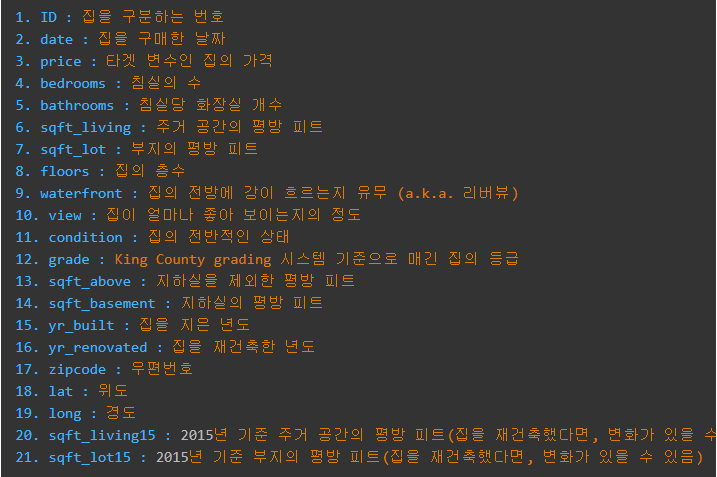
- 집에 대한 다양한 정보가 들어있는 것으로 보임
- 이들의 특징을 활용해서 집의 가격을 맞추어야 함

### 데이터 불러오기
- 데이터를 'data', 'sub'라는 변수로 불러오기
- 학습 데이터는 약 1만 5천 개, 테스트 데이터는 약 6천 개로 이루어져 있음
- 테스트 데이터에는 맞추어야 할 집의 가격, price가 없기 때문에 컬럼이 하나 적음

In [4]:
data = pd.read_csv(train_data_path)
sub = pd.read_csv(sub_data_path)
print('train data dim: {}'.format(data.shape))
print('sub data dim: {}'.format(sub.shape))

train data dim: (15035, 21)
sub data dim: (6468, 20)


### 학습 데이터에서 라벨 제거하기
- price 컬럼은 따로 y라는 변수에 저장한 후 해당 컬럼은 지워주기
- [w3schools - python del keywood](https://www.w3schools.com/python/ref_keyword_del.asp)
- 데이터 분석 과정에서 컬럼을 없애고 싶다면 [pandas.DataFrame.drop](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html) 사용할 수 있음

In [5]:
y = data['price']
del data['price']

print(data.columns)

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


### 학습 데이터와 테스트 데이터 합치기
- 모델을 학습시키기 전에, 전체 데이터에 대해 탐색해보기 위해 2개의 데이터를 'pd.concat'으로 합쳐보기
- 물론, 모델 학습을 진행할 때에는 다시 분리해서 사용해야 하기 때문에 데이터를 합치기 전 'train_len'에 'training_data'의 개수를 저장해서 추후에 학습데이터만 불러올 수 있는 인덱스로 사용

In [6]:
train_len = len(data)
data = pd.concat((data, sub), axis = 0)

print(len(data))

21503


In [7]:
data.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,20141013T000000,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,20150225T000000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,20150218T000000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,20140627T000000,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,20150115T000000,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


### 간단한 전처리
- 빈 데이터와 전체 데이터의 분포를 확인하는 전처리 작업
- 결측치, 즉 빈 데이터가 있는지는 위에서 설명했던 'missingno' 라이브러리를 사용해서 확인
- 원본 노트북에서는 다음과 같이 설명
> 각 변수들에 대해 결측 유무를 확인하고, 분포를 확인해보면서 간단하게 전처리. 
> 먼저, 데이터에 결측치가 있는지 확인
> missingno 라이브러리의 matrix 함수를 사용하면, 데이터의 결측 상태를 시각화를 통해 살펴볼 수 있음
- 아래 출력된 것은 'data'라는 'DataFrame'을 매트릭스 모양 그대로 시각화한 것
- 만약 특정 row, col에 NaN이라는 결측치가 있었따면 해당 부분이 하얗게 나옴
- 결측치가 없다면 매트릭스 전체가 까맣게 나옴
- [데이터프레임 고급 인덱싱](https://datascienceschool.net/01%20python/04.03%20%EB%8D%B0%EC%9D%B4%ED%84%B0%ED%94%84%EB%A0%88%EC%9E%84%20%EA%B3%A0%EA%B8%89%20%EC%9D%B8%EB%8D%B1%EC%8B%B1.html?highlight=%EB%8D%B0%EC%9D%B4%ED%84%B0%ED%94%84%EB%A0%88%EC%9E%84%20%EA%B3%A0%EA%B8%89%20%EC%9D%B8%EB%8D%B1%EC%8B%B1)

<AxesSubplot:>

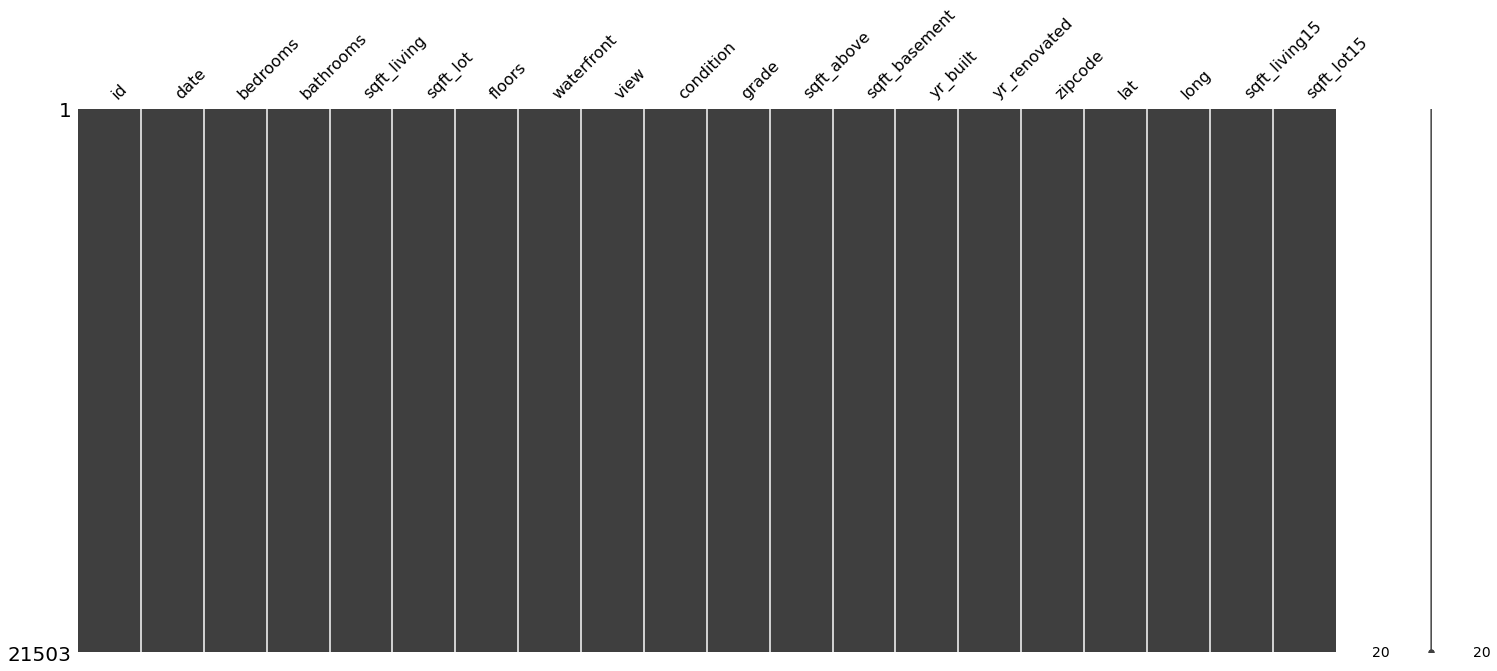

In [8]:
msno.matrix(data)

In [9]:
# 직접 결측치의 개수를 출력해서 확인할 수도 있음
for c in data.columns:
    print('{}: {}'.format(c, len(data.loc[pd.isnull(data[c]), c].values)))

id: 0
date: 0
bedrooms: 0
bathrooms: 0
sqft_living: 0
sqft_lot: 0
floors: 0
waterfront: 0
view: 0
condition: 0
grade: 0
sqft_above: 0
sqft_basement: 0
yr_built: 0
yr_renovated: 0
zipcode: 0
lat: 0
long: 0
sqft_living15: 0
sqft_lot15: 0


### id, data 변수 정리
- 필요 없는 id 컬럼을 제거. 나중에 예측 결과를 제출할 때를 대비하여 'sub_id' 변수에 'id' 컬럼을 저장해두고 지우도록 함

In [10]:
sub_id = data['id'][train_len:]
del data['id']

print(data.columns)

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [11]:
# 'date' 컬럼은 apply 함수로 필요한 부분만 잘라주기
# [Pandas Lmbda, apply를 활용하여 복잡한 로직 적용하기]
# https://data-newbie.tistory.com/207
# str(x[:6])으로 처리한 것은 '20141013T000000' 형식의 데이터를 연'월 데이터만 사용하기 위해 201410까지 자른 것
data['date'] = data['date'].apply(lambda x:str(x[:6])) 
data.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,201410,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,201502,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,201502,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,201406,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,201501,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


### 각 변수들의 분포 확인
- 전체 데이터들의 분포 확인
- 특히 너무 치우친 분포를 가지는 컬럼의 경우, 모델이 결과를 예측하는 데에 좋지 않은 영향을 마치므로 다듬는 작업 하기
- 아래 시각화 코드를 통해, id 컬럼을 제외한 19개 컬럼에 대해 한 번에 모든 그래프 그려주기
- 10행 2열의 subplot에 그래프 그리기 위해 2중 for문을 사용하고 있음
- 그래프의 종류는 'sns.kdeplot'을 사용
- 'kdeplot'은 이산(discrete) 데이터의 경우에도 부드러운 곡선으로 전체 분포를 확인할 수 있도록 하는 시각화 함수
- [seaborn.kdeplot](https://seaborn.pydata.org/generated/seaborn.kdeplot.html)
- 그래프의 분포를 보면 어떤 처리 해주면 좋을지 떠올릴 수 있음
- 아리 그래프 중에서는 'bedrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15' 변수가 한쪽으로 치우친 경향
- 이렇게 한 쪽으로 치우친 분포의 경우에는 로그 변환(log-scaling)을 통해 데이터 분포를 정규분포에 가깝게 만들 수 있음

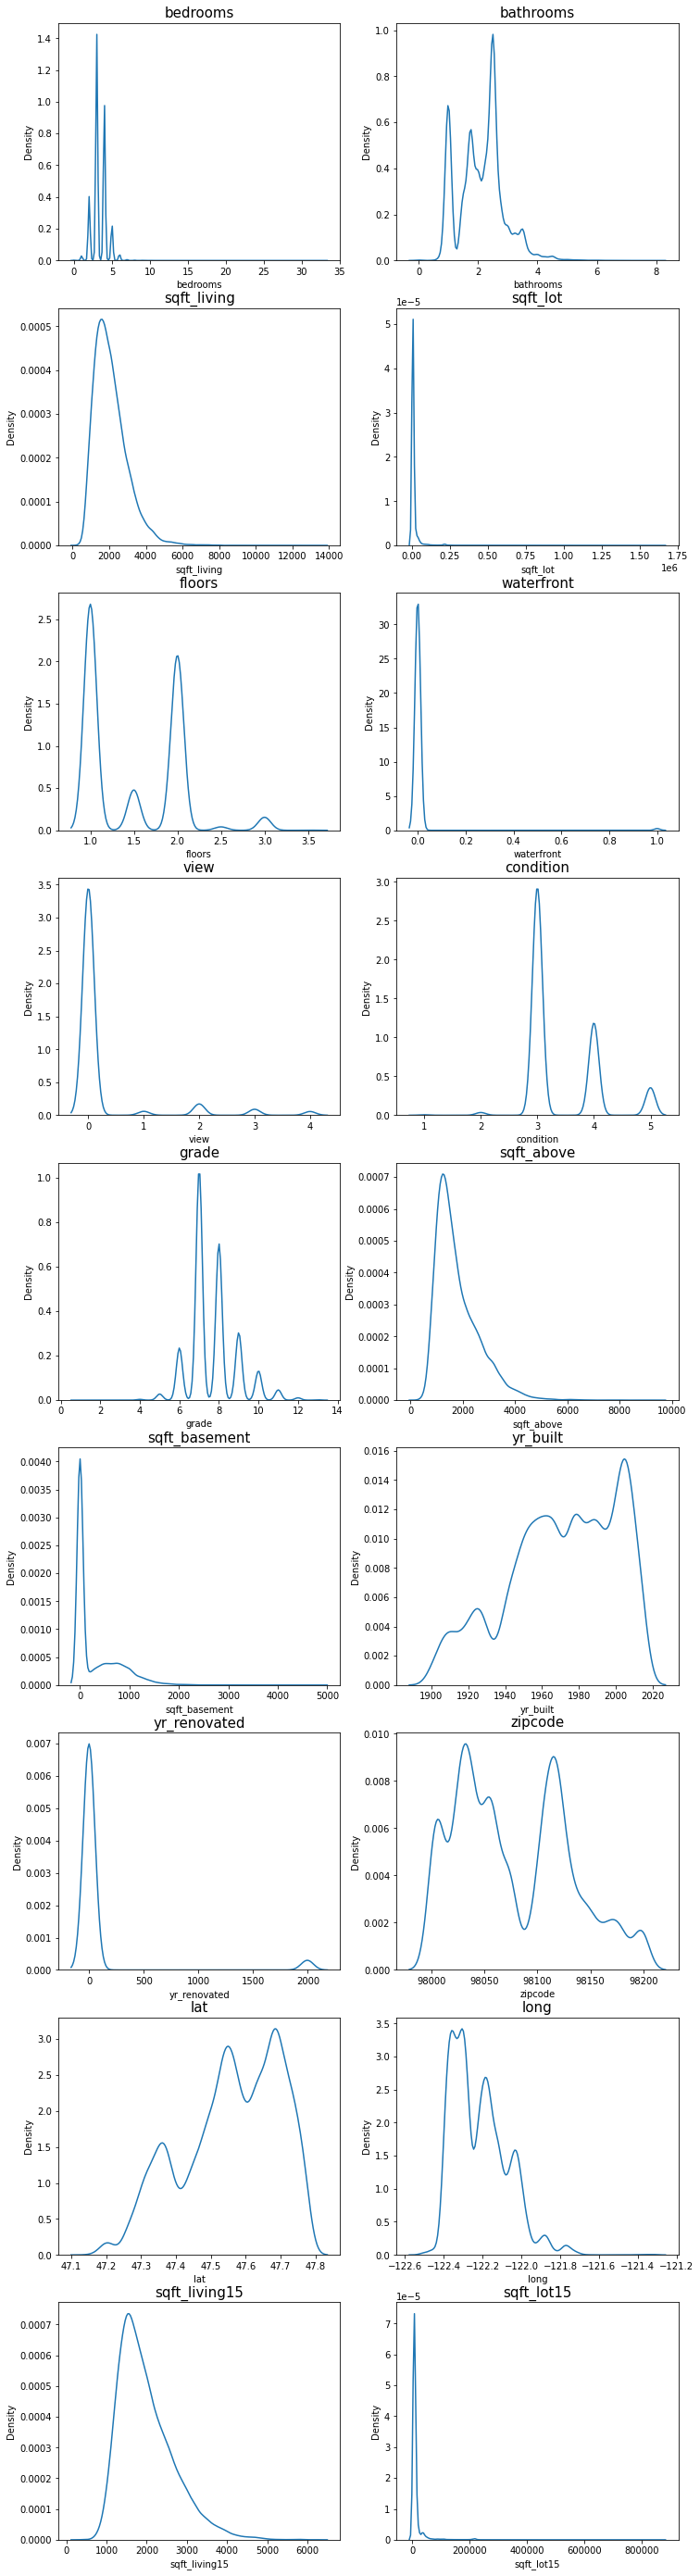

In [12]:
fig, ax = plt.subplots(9, 2, figsize = (12, 50))

# id 변수(count==0인 경우)는 제외하고 분포를 확인
count = 1
columns = data.columns
for row in range(9):
    for col in range(2):
        sns.kdeplot(data[columns[count]], ax = ax[row][col])
        ax[row][col].set_title(columns[count], fontsize = 15)
        count += 1
        if count == 19:
            break

In [13]:
# 치우친 컬럼들을 'skew_columns' 리스트 안에 담기
# 모두 np.log1p()를 활용해서 로그 변환 해주기
# numpy.log1p() 함수는 입력 배열의 각 요소에 대해 자연로그 log(1+x)을 반환해 주는 함수
skew_columns = ['bedrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement','sqft_lot15', 'sqft_living15']

for c in skew_columns:
    data[c] = np.log1p(data[c].values)
    
print('얍💢')

얍💢


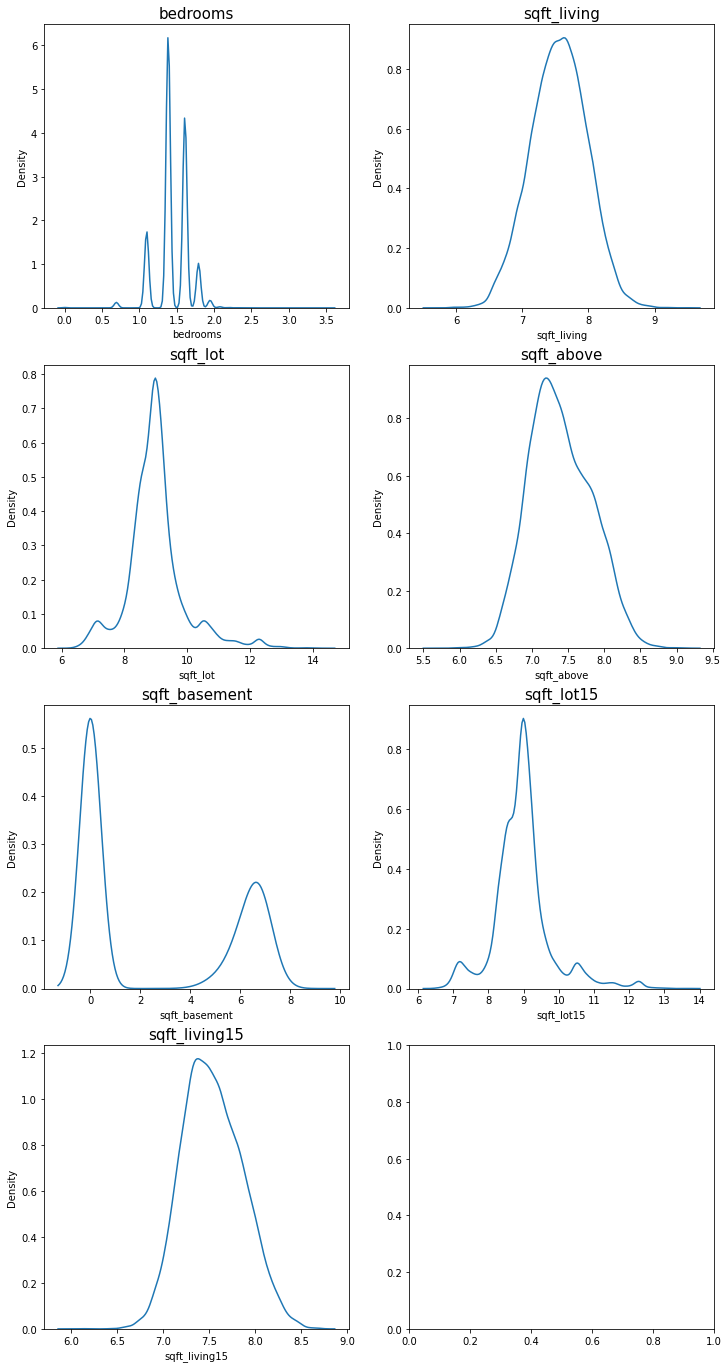

In [14]:
# 변환이 된 후의 분포 확인
fix, ax = plt.subplots(4, 2, figsize = (12, 24))

count = 0
for row in range(4):
    for col in range(2):
        if count == 7:
            break
        sns.kdeplot(data[skew_columns[count]], ax = ax[row][col])
        ax[row][col].set_title(skew_columns[count], fontsize = 15)
        count += 1

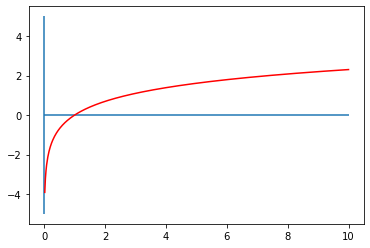

In [15]:
# 왜 로그 변환은 분포의 치우침을 줄어들게 만드는가?
# 로그 함수의 형태를 보면 알 수 있음
xx = np.linspace(0, 10, 500)
yy = np.log(xx)

plt.hlines(0, 0, 10)
plt.vlines(0, -5, 5)
plt.plot(xx, yy, c = 'r')
plt.show()

### 로그 함수의 특징은 다음과 같음
- 0 < x < 1 범위에서는 기울기가 매우 가파름. 즉, x의 구간은 (0, 1)로 매우 잛은 반면, y의 구간은 (−∞,0)으로 매우 큼
- 따라서 0에 가깝게 모여있는 값들이 x로 입력되면, 그 함수값인 y값들은 매우 큰 범위로 벌어지게 됨. 즉, 로그 함수는 0에 가까운 값들이 조밀하게 모여있는 입력값을, 넓은 범위로 펼칠 수 있는 특징을 가지게 됨
- 반면, x값이 점점 커짐에 따라 로그 함수의 기울기는 급격히 작아짐. 이는 곧, 큰 x값들에 대해서는 y값이 크게 차이나지 않게 된다는 뜻이고, 따라서 넓은 범위를 가지는 x를 비교적 작은 y값의 구간 내에 모이게 하는 특징 가짐
- 위와 같은 특성 때문에 한 쪽으로 몰려 있는 분포에 로그 변환을 취하게 되면 넓게 퍼질 수 있는 것
- 한쪽으로 치우친 분포를 로그 변환을 취하게 되면 정규분포 모양으로 고르게 분포하게 되는 이유

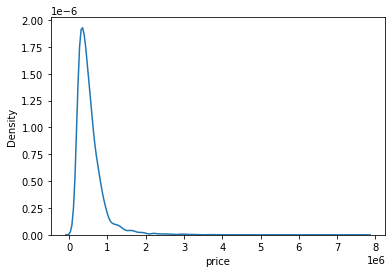

In [16]:
# 타겟인 집의 가격, 즉 'data['price']'의 분포를 로그 변환했을 때 결과 유추
# 원래 price의 분포는 다음과 같음
# 0 쪽으로 매우 심하게 치우쳐져 있는 분포
# 즉, 0과 1000000 사이에 대부분의 값들이 몰려있고, 아주 소수의 집들이 굉장히 높은 가격 보임
# 로그 변환 취하면, 0에 가깝게 몰려있는 데이터들은 넓게 퍼질 것이고
# 매우 크게 퍼져있는 소수의 데이터들은 작은 y값으로 모일 것
sns.kdeplot(y)
plt.show()

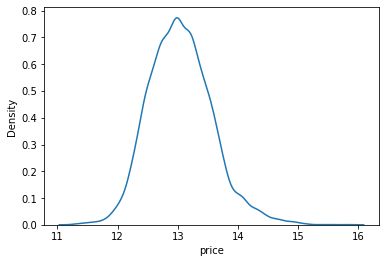

In [17]:
# 위 분포를 로그 변환을 취하게 되면
# 왼쪽으로 치우친 값들은 보다 넓은 범위로 고르게 퍼지고
# 오른쪽으로 얇고 넓게 퍼진 값들은 보다 작은 범위로 모이게 되므로
# 전체 분포는 정규분포의 형상을 띄는 방향으로 변환
y_log_transformation = np.log1p(y)

sns.kdeplot(y_log_transformation)
plt.show()

In [18]:
# 로그 변환이 필요한 데이터에 대해 처리 마무리
# 전체 데이터를 다시 나눠주기
# 위에서 저장해두었던 train_len을 인덱스로 활용
# ':train_len'까지는 학습 데이터, 즉 x에 저장
# 'train_len:' 부터는 실제로 추론을 해야 하는 테스트 데이터, sub 변수에 저장
sub = data.iloc[train_len:, :]
x = data.iloc[:train_len, :]

print(x.shape)
print(sub.shape)

(15035, 19)
(6468, 19)


## 7. 일단 제출하고 시작해! Baseline 모델 (4) 모델 설계

### 모델링
- 본격적으로 학습시킬 모델 준비
- Baseline 커널에서는 여러 가지 모델을 함께 사용해서 결과를 섞는, **블렌딩(blending)** 기법 활용
- 블렌딩? 하나의 개별 모델을 사용하는 것이 아니라 다양한 여러 모델을 종합하여 결과를 얻는 기법
- 블렌딩은 앙상블 기법이라고 하기도 함
- [Part 1. Introduction to Ensemble Learning](https://subinium.github.io/introduction-to-ensemble-1/#:~:text=%EC%95%99%EC%83%81%EB%B8%94(Ensemble)%20%ED%95%99%EC%8A%B5%EC%9D%80%20%EC%97%AC%EB%9F%AC,%EB%A5%BC%20%EA%B0%80%EC%A7%80%EA%B3%A0%20%EC%9D%B4%ED%95%B4%ED%95%98%EB%A9%B4%20%EC%A2%8B%EC%8A%B5%EB%8B%88%EB%8B%A4.)
- 앙상블은 강력한 개별 모델 하나보다 약한 여러 개의 모델의 결과를 합치는 것이 낫다는 기본 전제로부터 시작됨
- 위 전제가 실행되는 이유는 아래 포스팅에서 확인할 수 있음
- [Kaggle Ensemble Guide](https://gentlej90.tistory.com/73)

### Average Blending
- 여러 가지 모델의 결과를 산술평균하여 블렌딩 모델 만들었음
- 모델은 부스팅 계열인 'gboost', 'xgboost, 'lightgbm' 3가지 사용

In [19]:
gboost = GradientBoostingRegressor(random_state=2019)
xgboost = xgb.XGBRegressor(random_state=2019)
lightgbm = lgb.LGBMRegressor(random_state=2019)

models = [{'model':gboost, 'name':'GradientBoosting'}, {'model':xgboost, 'name':'XGBoost'},
          {'model':lightgbm, 'name':'LightGBM'}]

print('얍💢')

얍💢


### Cross Validation
- 교차 검증을 통해 모델의 성능을 간단히 평가

In [20]:
def get_cv_score(models):
    kfold = KFold(n_splits = 5, random_state = 2019).get_n_splits(x.values)
    for m in models:
        CV_score = np.mean(cross_val_score(m['model'], X = x.values, y = y, cv = kfold))
        print(f"Model: {m['name']}, CV score:{CV_score:.4f}")
print('얍💢')

얍💢


In [21]:
get_cv_score(models)

Model: GradientBoosting, CV score:0.8598
Model: XGBoost, CV score:0.8860
Model: LightGBM, CV score:0.8819


### Make Submission File
- 'cross_val_score()'함수는 회귀모델을 전달할 경우 R^^2 점수를 반환
- R^^2 값은 1에 가까울소록 모델이 잘 학습되었다는 것 나타냄
- 결정계수 R^^2 값에 대한 간단한 아래 링크의 글 참고
- [결정계수 R suqred](https://newsight.tistory.com/259)
- 위의 결과를 보니, 3개 트리 모델이 모두 훈련 데이터에 대해 괜찮은 성능 보여주고 있음
- Baseline 모델에서는 다음과 같이 여러 모델을 입력하면 각 모델에 대한 예측 결과를 펴균 내어 주는 AgeragingBlending() 함수 만들어 사용
- AgeragingBlending() 함수는 'models' 딕셔너리 안에 있는 모델을 모두 'x'와 'y'로 학습시킨 뒤, predictions에 그 예측 결과값을 모아서 평균한 값을 반환함

In [22]:
def AveragingBlending(models, x, y, sub_x):
    for m in models:
        m['model'].fit(x.values, y)
        
    predictions = np.column_stack([
        m['model'].predict(sub_x.values) for m in models
    ])
    return np.mean(predictions, axis = 1)
print('얍💢')

얍💢


In [23]:
# 함수를 활용해서 예측값 생성
y_pred = AveragingBlending(models, x, y, sub)
print(len(y_pred))
y_pred

6468


array([ 529966.66304912,  430726.21272617, 1361676.91242777, ...,
        452081.69137012,  341572.97685942,  421725.1231835 ])

### 결과를 캐글에 제출
- 제출해야 하는 csv 파일의 샘플이 바로 'data' 폴더에 있는 'sample_submission.csv'
- 아래 코드로 'sample_submission.csv' 파일을 확인

In [24]:
data_dir = os.getenv('HOME') + '/aiffel/kaggle_kakr_housing/data'

submission_path = join(data_dir, 'sample_submission.csv')
submission = pd.read_csv(submission_path)
submission.head()

,id,price
0,15035,100000
1,15036,100000
2,15037,100000
3,15038,100000
4,15039,100000


In [25]:
#'id'와 'price'의 2가지 열로 구성되어 있음
# 이에 맞게 'id'와 'price'로 구성된 데이터 프레임을 만들어주기
result = pd.DataFrame({
    'id:':sub_id,
    'price':y_pred
})
result.head()

,id:,price
0,15035,5.299667e+05
1,15036,4.307262e+05
2,15037,1.361677e+06
3,15038,3.338036e+05
4,15039,3.089006e+05


In [26]:
# 다음 코드로 'submission.csv' 파일 저장 -> 제출
my_submission_path = join(data_dir, 'submission.csv')
result.to_csv(my_submission_path, index = False)

print(my_submission_path)

/aiffel/aiffel/kaggle_kakr_housing/data/submission.csv


## 8. 일단 제출하고 시작해! Baseline 모델 (5) 캐글에 첫 결과 제출하기

- 이번 대회는 이미 끝난 대회이기 때문에 'Late Submission'만 가능한 상태
- 아래와 같이 탭에 있는 'Late Submission' 버튼을 클릭하면 다음과 같은 화면 만날 수 있음
- [대회 링크](https://www.kaggle.com/c/2019-2nd-ml-month-with-kakr)
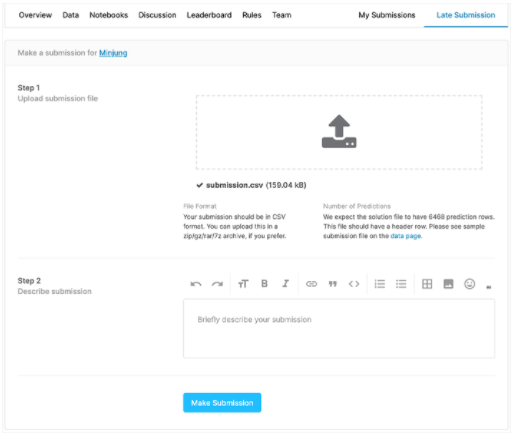
- 위의 화면에서 'Step 1'에 점섬으로 보이는 제출 박스를 클릭하거나, 'submission.csv' 파일을 해당 박스 안에 드래그앤드롭하면 파일이 업로드됨
- 성공적으로 업로드하였다면, 'Step 2'에 원하는 메세지를 작성한 후 'Make Submission'을 클릭
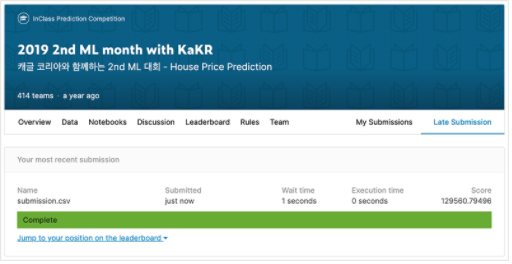
- 위와 같은 화면이 보인다면 성공
- 오른쪽에 '129560' 정도의 점수도 보임

## 9. 랭킹을 올리고 싶다면? (1) 다시 한번, 내 입맛대로 데이터 준비하기

### 최적의 모델을 찾아서, 하이퍼 파라미터 튜닝
- 지난 결과를 개선해 보는 시간
- 더 좋은 결과를 얻기 위해 직접 다양한 하이퍼 파라미터를 튜닝해보면서 모델의 성능을 끌어올려 볼 것

### 다시 한번, 내 입맛대로 데이터 준비하기

In [27]:
data_dir = os.getenv('HOME')+'/aiffel/kaggle_kakr_housing/data'

train_data_path = join(data_dir, 'train.csv')
test_data_path = join(data_dir, 'test.csv') 

train = pd.read_csv(train_data_path)
test = pd.read_csv(test_data_path)

print('얍💢')

얍💢


In [28]:
# 데이터 살펴보기
train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


In [29]:
# 'date' 전처리
# Baseline  커널이 했던 것과 달리, 'int', 즉 정수형 데이터로 처리
# 모델이 'date'도 예측을 위한 특성으로 활용
train['date'] = train['date'].apply(lambda i: i[:6]).astype(int)
train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,201410,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,201502,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,201502,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,201406,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,201501,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


In [30]:
# 타겟 데이터에 해당하는 'price' 컬럼 처리
# y 변수에 price를 넣어두고 train에서는 삭제
y = train['price']
del train['price']

print(train.columns)

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [31]:
# 마지막으로, 'id' 컬럼을 삭제하는 것까지 하면 기본적인 전처리는 모두 마무리됨
del train['id']

print(train.columns)

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [32]:
# test 데이터에 대해서도 같은 작업 진행
# 단, test에 우리가 맞추어야 할 타겟 데이터인 'price'는 없으니
# 훈련 데이터셋과는 다르게 'price'에 대한 처리는 해주지 않아도 됨
test['date'] = test['date'].apply(lambda i:i[:6]).astype(int)

del test['id']

print(test.columns)

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [33]:
# 타겟 데이터인 y 확인
y

0         221900.0
1         180000.0
2         510000.0
3         257500.0
4         291850.0
           ...    
15030     610685.0
15031    1007500.0
15032     360000.0
15033     400000.0
15034     325000.0
Name: price, Length: 15035, dtype: float64

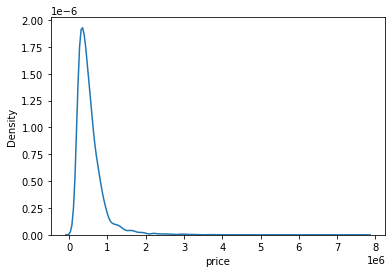

In [34]:
# 직접 코드 작성해 가격 데이터의 분포 확인
sns.kdeplot(y)
plt.show()

In [38]:
# price는 왼쪽으로 크게 치우쳐져 있는 형태
# 따라서, y는 np.log1p() 함수를 통해 로그 변환
# 나중에 모델이 값을 예측한 후에 다시 np.exp1m()을 활용해서 되돌리기
# np.exp1m()은 np.log1p()과는 반대로 각 원소 x마다 exp(x)-1의 값 반환
y = np.log1p(y)
y

0        12.309987
1        12.100718
2        13.142168
3        12.458779
4        12.583999
           ...    
15030    13.322338
15031    13.822984
15032    12.793862
15033    12.899222
15034    12.691584
Name: price, Length: 15035, dtype: float64

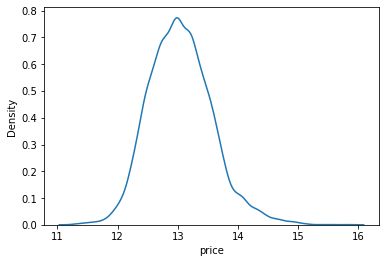

In [39]:
# 비교적 완만한 정규분포의 형태로 잘 변환됨
sns.kdeplot(y)
plt.show()

In [40]:
# info()함수로 전체 데이터의 자료형 확인
# 모두 실 수 또는 정수 자료형으로, 문제 없이 모델 학습에 활용할 수 있음
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15035 entries, 0 to 15034
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           15035 non-null  int64  
 1   bedrooms       15035 non-null  int64  
 2   bathrooms      15035 non-null  float64
 3   sqft_living    15035 non-null  int64  
 4   sqft_lot       15035 non-null  int64  
 5   floors         15035 non-null  float64
 6   waterfront     15035 non-null  int64  
 7   view           15035 non-null  int64  
 8   condition      15035 non-null  int64  
 9   grade          15035 non-null  int64  
 10  sqft_above     15035 non-null  int64  
 11  sqft_basement  15035 non-null  int64  
 12  yr_built       15035 non-null  int64  
 13  yr_renovated   15035 non-null  int64  
 14  zipcode        15035 non-null  int64  
 15  lat            15035 non-null  float64
 16  long           15035 non-null  float64
 17  sqft_living15  15035 non-null  int64  
 18  sqft_l

## 10. 랭킹을 올리고 싶다면? (2) 다양한 실험을 위해 함수로 만들어 쓰자

- 본격적으로 모델 튜닝
- 머신러닝 모델을 학습시키고 튜닝을 하다 보면 몇 시간이 훌쩍 지났는지 모를 만큼 실험해볼 것들이 많음
- 보다 다양하고 많은 실험을 하기 위해서는, 그만큼 실험을 위한 도구들이 잘 준비되어 있는 것이 유리
- 여러 가지 반복되는 작업들은 함수로 먼저 만들어 놓고 많은 실험을 하는 것이 좋음

### **RMSE 계산**
- 먼저 필요한 라이브러리 가져오기
- 데이터셋을 훈련 데이터셋과 검증 데이터셋으로 나누기 위한 'train_test_split' 함수와 RMSE 점수를 계산하기 위한 'mean_suared_error' 가져오기

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

print('얍💢')

얍💢


- 대회에서 점수를 매기는 것과 같은 평가 척도인 RMSE를 계산하기 위해 다음과 같은 함수 만들기
- 한 가지 주의해야 할 것? 'y_test'나 'y_pred'는 위에서 'np.log1p()'로 변환이 된 값이기 때문에 원래 데이터의 단위에 맞게 되돌리기 위헤 np.expm1()을 추가해야 한다는 점
- 'exp'로 다시 변환해서 'mean_suqred_error'를 계산한 값에 'np.squrt를 취하면 RMSE 값을 얻을 수 있음

In [49]:
def rmse(y_test, y_pred):
    return np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(y_pred)))
print('얍💢')

얍💢


In [50]:
# 다음으로 XGBRegressor, LGBMRegressor, GradientBoostingRegressor, RandomForestRegressor 4가지 모델 가져오기
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

print('얍💢')

얍💢


- 아래와 같이 모델 인스턴스를 생성한 후, 'models'라는 리스트에 넣어주기
- 이때, 모델 파라미터 초기화나 데이터셋 구성에 사용되는 랜던 시드값인'random_state' 값을 특정 값으로 고정시키거나, 아니면 지정하지 않고 None으로 세팅
- random_state를 고정값으로 주면 모델과 데이터셋이 동일한 경우, 머신러닝 학습결과도 항상 동일하게 재현
- 하지만, 이 값을 지정하지 않고 None으로 남겨 두면 모델 내부에서 랜덤 시드값을 임의로 선택
- 결과적으로 파라미터 초기화나 데이터셋 구성 양상이 달라져서 모델과 데이터셋이 동일하더라도 머신러닝 학습결과는 학습할 때마다 달라짐
- 앞으로, 베이스라인에서부터 시작해서 다양한 실험 통해 성능이 개선되는지를 검증해 보려고 함
- 이때, 어떤 시도가 모델 성능 향상에 긍정적이었는지 여부를 판단하기 위해서는 랜덤적 요소의 변화 때문에 생기는 불확실성을 제거해야 함
- 따라서, 아래와 같이 random_state 값을 특정 값으로 고정
- 혹시 고정하지 않았을 때 어떤 상황이 벌어지는지 궁금하다면 random_state 값을 None으로 남겨두고 실험 반복

In [51]:
# random_state는 모델초기화나 데이터셋 구성에 사용되는 랜덤 시드값
# random_state = None가 초기값. 아무것도 지정하지 않고 None을 넘겨주면 모델 내부에서 임의로 선택
# 고정값을 2020으로 세팅
random_state = 2020

gboost = GradientBoostingRegressor(random_state = random_state)
xgboost = XGBRegressor(random_state = random_state)
lightgbm = LGBMRegressor(random_state = random_state)
rdforest = RandomForestRegressor(random_state = random_state)

models = [gboost, xgboost, lightgbm, rdforest]

print('얍💢')

얍💢


In [52]:
# 각 모델의 이름은 다음과 같이 클래스의 __name__ 속성에 접근해서 얻을 수 있음
gboost.__class__.__name__

'GradientBoostingRegressor'

In [53]:
# 이름에 접근할 수 있다면, 다음과 같이 'for'문 안에서 각 모델 별로 학습 및 예측 해볼수 있음

df = {}

for model in models:
    # 모델 이름 획득
    model_name = model.__class__.__name__
    
    # train, test 데이터셋 분리 - 여기에도 random_state 고정
    X_train, X_test, y_train, y_test = train_test_split(train, y, random_state = random_state, test_size = 0.2)
    
    # 모델 학습
    model.fit(X_train, y_train)
    
    # 예측
    y_pred = model.predict(X_test)
    
    # 예측 결과의 rmse 값 저장
    df[model_name] = rmse(y_test, y_pred)
    
    # data frame에 저장
    score_df = pd.DataFrame(df, index = ['RMSE']).T.sort_values('RMSE', ascending = False)
    
df  

{'GradientBoostingRegressor': 128360.19649691365,
 'XGBRegressor': 110318.66956616656,
 'LGBMRegressor': 111920.36735892233,
 'RandomForestRegressor': 125487.07102453562}

In [54]:
# 위의 과정을 'get_scores(models, train, y)' 함수로 만들어 보기
def get_scores(models, train, y):
    df = {}
    
    for model in models:
        model_name = model.__class__.__name__
        
        X_train, X_test, y_train, y_test = train_test_split(train, y, raondom_state = random_state, test_size = 0.2)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
        df[model_name] = rmse(y_test, y_pred)
        score_df = pd.DataFrame(df, index = ['RMSE']).T.sort_values('RMSE', ascending = False)
    
    return score_df

## 11. 파라미터 튜이의 최강자, 그리드 탐색
- 모델과 데이터셋이 있다면 RMSE 결괏값 나타내주는 함수가 준비되었으니, 다양한 하이퍼 파라미터로 실험하는 일만 남음
- 실험은 'sklearn.model_selection' 라이브러리 안에 있는 'GridSearchCV' 클래스를 활용

In [55]:
from sklearn.model_selection import GridSearchCV

print('얍💢')

얍💢


- GridSearchCV란 무엇일까?
- 우선 그리드 탐색과 랜덤 탐색을 알아볼 필요가 있음. 2가지 모두 하이퍼 파라미터를 조합해 보는 방법
- 그리드 탐색은 사람이 먼저 탐색할 하이퍼 파라미터의 값들을 정해두고, 그 값들로 만들어질 수 있는 모든 조합을 탐색. 특정 값에 대한 하이퍼 파라미터 조합을 모두 탐색하고자 할 때 유리
- 랜덤 탐색은 사람이 탐색할 하이퍼 파라미터의 공간만 정해두고, 그 안에서 랜덤으로 조합을 선택해서 탐색하는 방법
- 그리드 탐색에서는 사람이 정해둔 값들로 이루어지는 조합만 탐색하기 때문에 최적의 조합을 놓칠 수 있는 반면, 랜덤 탐색에서는 말 그대로 랜덤으로 탐색하기 때문에 최적의 조합을 찾을 수 있는 가능성이 언제나 열려 있음. 하지만, 그 가능성 또한 랜덤성에 의존하기 때문에 언제나 최적을 찾는다는 보장은 없음
- 다음 이미지가 그리드 탐색(grid search)과 랜덤 탐색(random search) 2가지를 잘 나타내고 있음
- 그리드 탐색은 정해진 하이퍼 파라미터의 조합을 격자와 같이 탐색하는 반면, 랜덤 탐색은 랜덤으로 점을 찍어서 탐색
- 확실히 그리드 탐색의 탐색 공간은 매우 제한적인 반면 랜덤 탐색은 탐색하는 공간이 훨씬 넓음
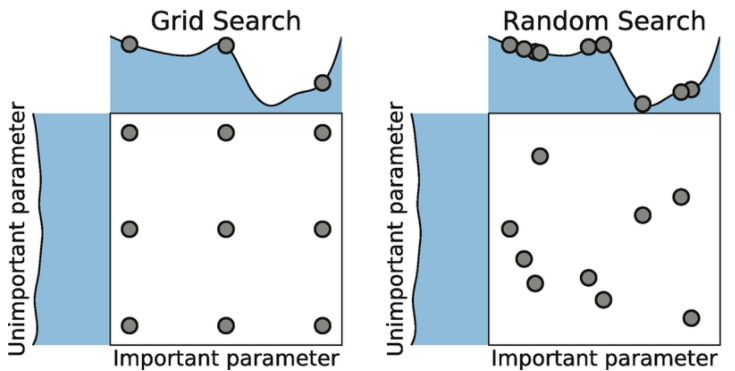

- 이 부분에서는 다양한 파라미터를 입력하면 가능한 모든 조합을 탐색하는 사이킷런의 'GridSearchCV'를 활용해 볼것
- GridSearchCV에 입력되는 인자들은 다음과 같음
    - param_grid: 탐색할 파라미터의 종류(딕셔너리로 입력)
    - scoring: 모델의 성능을 평가할 지표
    - cv: cross validation을 수행하기 위해 train 데이터셋을 나누는 조각의 개수
    - verbose: 그리드 탐색을 진행하면서 진행 과정을 출력해서 보여줄 메세지의 양(쑷자가 클수록 더 많은 메세지를 출력함)
    - n_jobs: 그리드 탐색을 진행하면서 사용할 CPU의 개수

In [59]:
# 'param_gird'에 탐색할 xgboost 관련 하이퍼 파라미터 넣어서 준비
param_grid = {
    'n_estimators':[50, 100],
    'max_depth':[1, 10],
}

In [60]:
# 모델 준비
# 모델은 LightGBM(lgbm) 사용
model = LGBMRegressor(random_state = random_state)
print('얍💢')

얍💢


In [61]:
# model, param_grid와 함께 다른 여러 가지 인자를 넣어서 'GridSearchCV'를 수행할 수 있음
# GridSearchCV 이용해서 grid_model 모델을 초기화하고
# train과 test 데이터로 모델을 간단히 학습시키면
# param_grid 내의 모든 하이퍼 파라미터의 조합에 대한 실험이 완료됨
grid_model = GridSearchCV(model, param_grid = param_grid, \
                          scoring = 'neg_mean_squared_error', \
                          cv = 5, verbose = 1, n_jobs = 5)
grid_model.fit(train, y)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  20 out of  20 | elapsed:    1.9s finished


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


GridSearchCV(cv=5, estimator=LGBMRegressor(random_state=2020), n_jobs=5,
             param_grid={'max_depth': [1, 10], 'n_estimators': [50, 100]},
             scoring='neg_mean_squared_error', verbose=1)

In [62]:
# grid_model.fit 함수 통해 4가지 조합에 대한 실험 모두 마침
# 실험에 대한 결과는 grid_model.cv_resuts_안에 저장
# 정보가 너무 많아서 눈에 잘 들어오지 않음
# 원하는 값만 정제해서 확인
grid_model.cv_results_

{'mean_fit_time': array([0.08918962, 0.12301636, 0.24722791, 0.39544573]),
 'std_fit_time': array([0.00780866, 0.00895959, 0.01558098, 0.01041391]),
 'mean_score_time': array([0.01453638, 0.01315155, 0.01423354, 0.02909608]),
 'std_score_time': array([0.01125108, 0.01060676, 0.00033032, 0.00643805]),
 'param_max_depth': masked_array(data=[1, 1, 10, 10],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[50, 100, 50, 100],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 1, 'n_estimators': 50},
  {'max_depth': 1, 'n_estimators': 100},
  {'max_depth': 10, 'n_estimators': 50},
  {'max_depth': 10, 'n_estimators': 100}],
 'split0_test_score': array([-0.0756974 , -0.05555652, -0.02885847, -0.02665428]),
 'split1_test_score': array([-0.07666447, -0.057876  , -0.03041465, -0.02795896]),
 'split2_test_score': array([-0.07354904

In [65]:
# 관심 있는 정보? 어떤 파라미터 조합일 때 점수가 어떻게 나오게 되는지에 관한 것
# 파라미터 조합은 위 딕셔너리 중 'params'에
# 각각에 대한 테스트 점수는 'mean_test_score'에 저장되어 있음
# 이 2개의 정보만 빼내어 보기
params = grid_model.cv_results_['params']
params

[{'max_depth': 1, 'n_estimators': 50},
 {'max_depth': 1, 'n_estimators': 100},
 {'max_depth': 10, 'n_estimators': 50},
 {'max_depth': 10, 'n_estimators': 100}]

In [66]:
# params에는 각 파라미터의 조합이
# score에는 각 조합에 대한 점수가 들어가 있음
score = grid_model.cv_results_['mean_test_score']
score

array([-0.07339447, -0.05502043, -0.02917734, -0.02702714])

In [68]:
# params, score만 가지고 데이터프레임 만들고 최적의 성능 내는 하이퍼 파라미터의 조합 찾아보기
results = pd.DataFrame(params)
results['score'] = score

results

,max_depth,n_estimators,score
0,1,50,-0.073394
1,1,100,-0.055020
2,10,50,-0.029177
3,10,100,-0.027027


- 점수가 음수인 이유?
- GridSearchCV로 'grid_model' 초기화할 때, scoring 인자에 MSE에 음수를 취한 값인 neg_mean_squared_error를 입력했음
- 'GridSearchCV'를 사용할 때에는 이 외에도 다양한 점수 체계(scoring) 사용할 수 있음. 그에 대한 정보는 아래 페이지에서 확인
- [사이킷런 - The scoring parameter: defining model evaluation rules](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter)
- 어떤 문제(Classification, Clustering, Regression)를 푸느냐에 따라 각 상황에 알맞은 점수 체계 사용할 수 있음

In [70]:
# 아래와 같은 간단한 변환 함수로 RMSE 점수 확인
# 음수로 된 MSE였으니, -1을 곱해주고 np.sqrt로 루트 연산
results['RMSE'] = np.sqrt(-1 * results['score'])
results

,max_depth,n_estimators,score,RMSE
0,1,50,-0.073394,0.270914
1,1,100,-0.055020,0.234564
2,10,50,-0.029177,0.170814
3,10,100,-0.027027,0.164399


- 위에서 보았던 10만 단위의 RMSE와는 값의 크기가 아주 다름
- 그 이유는 'price'에 있음
    - price의 분포가 한쪽으로 치우쳐져 있는 것을 보고 log 변환을 했음
    - 그 후 RMSE 값을 계산하기 위한 함수에서는 'np.expm1' 함수를 활용해 다시 원래대로 복원한 후 RMSE 값 계산
- 그리드 탐색을 하며, np.expm1()으로 변환하는 과정이 없었기 때문에 log 변환되어 있는 price 데이터에서 손실함수값을 계산한 것
- 따라서, 위의 데이터 프레임에 나타난 값은 정확히 말하면 RMSE가 아니라 RMSLE, 즉 Root Mean Squared Log Error
- log를 취한 값에서 RMSE를 구했다는 뜻
- 이에 맞게 컬럼의 이름을 RMSLE로 변환

In [71]:
results = results.rename(columns = {'RMSE':'RMSLE'})
results

,max_depth,n_estimators,score,RMSLE
0,1,50,-0.073394,0.270914
1,1,100,-0.055020,0.234564
2,10,50,-0.029177,0.170814
3,10,100,-0.027027,0.164399


In [72]:
# 마지막으로, RMSLE가 낮은 순서대로 정렬
# sort_values로 간단히 할 수 있음
# [pandas.DataFrame.sort_values](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html)
results.sort_values(by = ['RMSLE'])

,max_depth,n_estimators,score,RMSLE
3,10,100,-0.027027,0.164399
2,10,50,-0.029177,0.170814
1,1,100,-0.055020,0.234564
0,1,50,-0.073394,0.270914


In [75]:
# 위의 과정을 하나의 함수로 만들어서 앞으로는 간결한 코드로 진행
"""
다음과 같은 과정을 진행할 수 있는 'my_GridSearch(model, train, y , param_grid, verbose = 2, n_jobs = 5)' 함수를 구현

1. GridSearchCV 모델로 'model'을 초기화
2. 모델을 fitting하기
3. params, score에 각 조합에 대한 결과를 저장
4. 데이터 프레임을 생성하고, RMSLE 값을 추가한 후 점수가 높은 순서로 정렬한 'results' 반환
"""
def my_GridSearch(model, train, y, param_grid, verbose = 2, n_jobs = 5):
    # 1. GridSearchCV 모델로 초기화
    grid_model = GridSearchCV(model, param_grid = param_grid, scoring = 'neg_mean_squared_error', cv = 5, verbose = verbose, n_jobs = n_jobs)
    
    # 2. 모델 fitting
    grid_model.fit(train, y)
    
    # 3. 결과값 저장
    params = grid_model.cv_results_['params']
    score = grid_model.cv_results_['mean_test_score']
    
    # 4. 데이터 프레임 생성
    results = pd.DataFrame(params)
    results['score'] = score
    
    # 5. RMSLE 값 계산 후 정렬
    results['RMSLE'] = np.sqrt(-1 * results['score'])
    results = results.sort_values('RMSLE')
    
    return results

## 12. 랭킹을 올리고 싶다면? (4) 제출하는 것도, 빠르고 깔끔하게!

- 실험을 통해 좋은 결과 내는 모델 찾았음
- 제출 과정 또한 하나의 함수로 깔끔하게 진행
- 위에서 만들어놓은 my_GridSearch() 함수로 간단한 그리드 탐색 진행

In [79]:
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [1, 10],
}

model = LGBMRegressor(random_state = random_state)
my_GridSearch(model, train, y, param_grid, verbose = 2, n_jobs = 5)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  20 out of  20 | elapsed:    1.8s finished


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


,max_depth,n_estimators,score,RMSLE
3,10,100,-0.027027,0.164399
2,10,50,-0.029177,0.170814
1,1,100,-0.055020,0.234564
0,1,50,-0.073394,0.270914


In [80]:
# 가장 좋은 조합은 max_depth = 10, n_estimators = 100
# 해당 모델로 학습을 해서 예측값인 submission.csv 파일 만들어서 제출
# 해당 파라미터로 구성된 모델을 준비하고, 학습 후 예측 결과 생성
model = LGBMRegressor(max_depth = 10, n_estimators = 100, random_state = random_state)
model.fit(train, y)
prediction = model.predict(test)
prediction

array([13.13580793, 13.08051399, 14.11202067, ..., 13.01592878,
       12.69894979, 12.96297768])

In [81]:
# 예측 결과에 np.expm1() 씌워서 다시 원래 스케일로 되돌리기
prediction = np.expm1(prediction)
prediction

array([ 506766.66784595,  479506.10405112, 1345155.15609376, ...,
        449515.92243642,  327402.87855805,  426332.71354302])

In [83]:
# sample_submission.csv 파일 가져오기
data_dir = os.getenv('HOME') + '/aiffel/kaggle_kakr_housing/data'
submission_path = join(data_dir, 'sample_submission.csv')
submission = pd.read_csv(submission_path)
submission.head()

,id,price
0,15035,100000
1,15036,100000
2,15037,100000
3,15038,100000
4,15039,100000


In [84]:
# 위의 데이터프레임에 우리의 모델이 예측한 값 덮어씌우기
submission['price'] = prediction
submission.head()

,id,price
0,15035,5.067667e+05
1,15036,4.795061e+05
2,15037,1.345155e+06
3,15038,3.122579e+05
4,15039,3.338645e+05


In [85]:
# 위의 데이터를 csv 파일로 저장
# 파일 이름에 모델의 종류와 위에서 확인했던 RMSLE 값을 넣어주기
submission_csv_path = '{}/submission_{}_RMSLE_{}.csv'.format(data_dir, 'lgbm', '0.164399')
submission.to_csv(submission_csv_path, index = False)
print(submission_csv_path)

/aiffel/aiffel/kaggle_kakr_housing/data/submission_lgbm_RMSLE_0.164399.csv


In [86]:
# 위의 과정들도 하나의 함수로 정리
"""
아래의 과정을 수행하는 `save_submission(model, train, y, test, model_name, rmsle)` 함수 구현하기
1. 모델을 `train`, `y`로 학습시킴
2. `test`에 대해 예측
3. 예측값을 `np.expm1`으로 변환하고, `submission_model_name_RMSLE_100000.csv` 형태의 `csv` 파일을 저장
"""
# 1. 모델을 'train', 'y'로 학습시킴
def save_submission(model, train, y, test, model_name, rmsle = None):
    model.fit(train, y)
    prediction = model.predict(test)
    prediction = np.expm1(prediction)
    data_dir = os.getenv('HOME') + '/aiffel/kaggle_kakr_housing/data'
    submission_path = join(data_dir, 'sample_submission.csv')
    submission = pd.read_csv(submission_path)
    submission['price'] = prediction
    submission_csv_path = '{}/submission_{}_RMSLE_{}.csv'.format(data_dir, model_name, rmsle)
    submission.to_csv(submission_csv_path, index = False)
    print('{} saved!'.format(submission_csv_path))

In [87]:
save_submission(model, train, y, test, 'lgbm', rmsle = '0.0168')

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
/aiffel/aiffel/kaggle_kakr_housing/data/submission_lgbm_RMSLE_0.0168.csv saved!
